In [24]:
import tensorflow as tf 
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy , SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , Dense , InputLayer , MaxPooling2D , Flatten , Rescaling , Resizing,BatchNormalization, Dropout ,RandomRotation, RandomFlip , RandomContrast,GlobalAveragePooling2D,RandomBrightness,RandomZoom,RandomWidth,RandomTranslation,RandomHeight,GaussianNoise,RandomCrop
import os 

In [25]:
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train) ,(x_val, y_val) = mnist.load_data() 

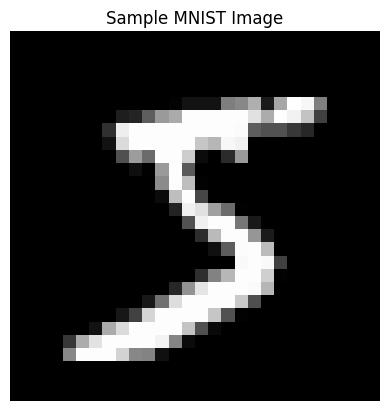

(28, 28)


In [27]:
plt.imshow(x_train[0], cmap='gray')  # Set cmap='gray' to view it in grayscale
plt.title("Sample MNIST Image")
plt.axis('off')  # Hide the axes for better visualization
plt.show()
print(x_train[0].shape)

In [28]:
x_train = x_train.astype('float32') / 255.0 
x_val = x_val.astype('float32') / 255.0 
x_train = x_train.reshape(-1, 28, 28, 1) 
x_val = x_val.reshape(-1, 28, 28, 1)


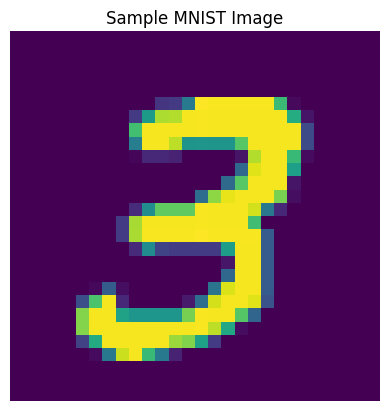

In [29]:
plt.imshow(x_train[7])  # Set cmap='gray' to view it in grayscale
plt.title("Sample MNIST Image")
plt.axis('off')  # Hide the axes for better visualization
plt.show()

In [30]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    
    Conv2D(filters=16, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        9280      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [31]:
# loss_function = SparseCategoricalCrossentropy()

# metrics = [SparseCategoricalAccuracy(name= 'accuracy')]
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)

In [32]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1875/1875 [==============================] - 39s 14ms/step - loss: 0.3043 - accuracy: 0.9099 - val_loss: 0.0666 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1114 - accuracy: 0.9660 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0395 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0446 - val_accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0409 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0377 -

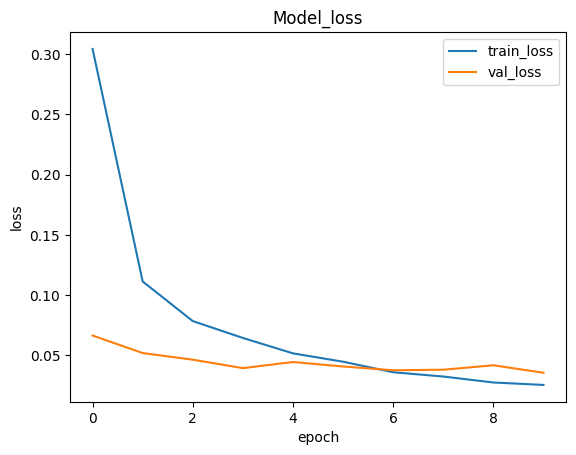

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()


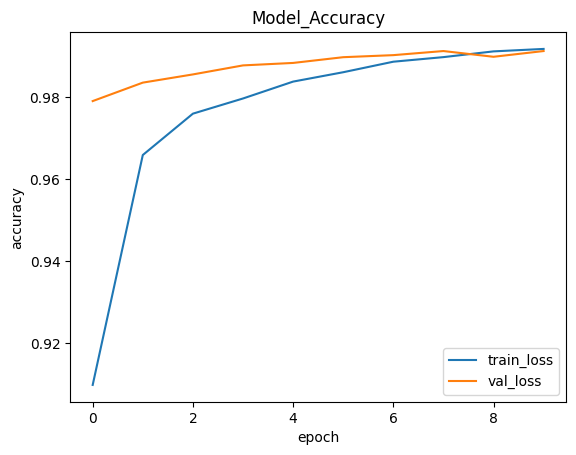

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

1/1 [==============================] - 0s 65ms/step
This digit is 2


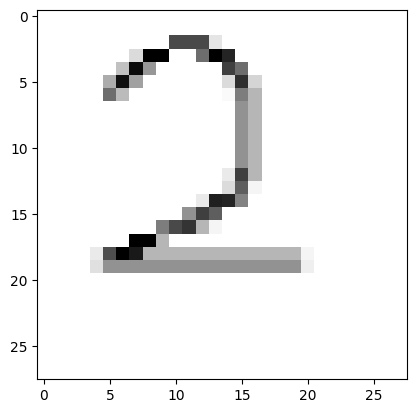

In [42]:
img = cv2.imread(r"C:\Users\tanma\OneDrive\Desktop\Space_game_ai\imgs\2.png", cv2.IMREAD_GRAYSCALE)
# Ensure resize is not commented out
img = cv2.resize(img, (28, 28))

# Normalize and reshape as intended

img = img.reshape(-1, 28, 28, 1)

# Predict and print the result
prediction = model.predict(img)
print(f"This digit is {np.argmax(prediction)}")

# Show the image
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()


In [43]:
model.save('nn.h5')